In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from numpy import expand_dims

In [ ]:
# 이미지 이름변경


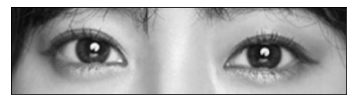

In [31]:
img = cv2.imread('eyes/dohwa/71.JPG', cv2.IMREAD_COLOR)
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap='gray')
plt.xticks([]) # x축 좌표 숨김
plt.yticks([]) # y축 좌표 숨김
plt.show()

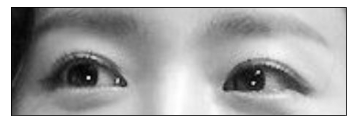

In [2]:
img = cv2.imread('eyes/dohwa/95.JPG', cv2.IMREAD_COLOR)
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap='gray')
plt.xticks([]) # x축 좌표 숨김
plt.yticks([]) # y축 좌표 숨김
plt.show()

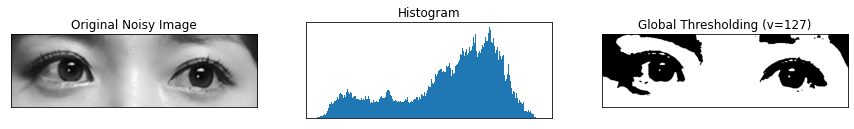

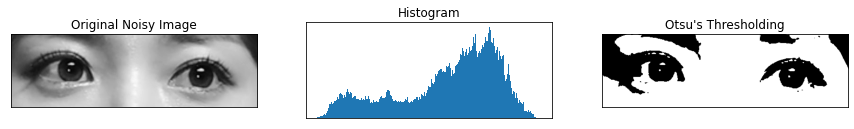

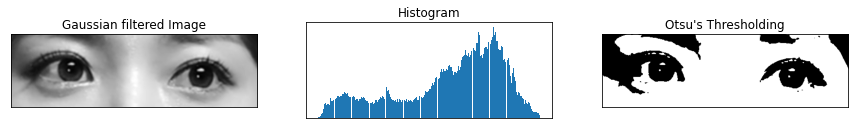

In [8]:
img = cv2.imread('eyes/dohwa/86.JPG',0)

# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)

ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    fig = plt.figure(figsize=(15, 6)) 
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

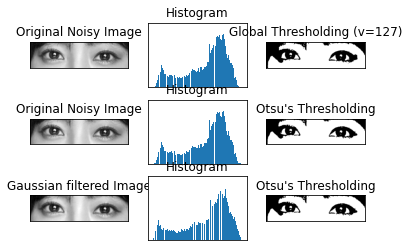

In [7]:
img = cv2.imread('eyes/dohwa/71.JPG',0)

# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)

ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

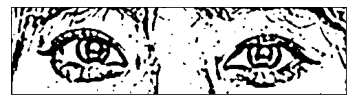

In [25]:
img = cv2.imread('eyes/dohwa/71.JPG', cv2.IMREAD_GRAYSCALE) 
ret, origin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
thr1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) 
thr2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) 
# plt.imshow(origin, cmap='gray')
blur4 = cv2.medianBlur(thr2, 5)
plt.imshow(blur4, cmap='gray')
# plt.imshow(thr2, cmap='gray')
plt.xticks([]) # x축 좌표 숨김
plt.yticks([]) # y축 좌표 숨김
plt.show()

In [40]:
for i in range(1,5721):
    img = cv2.imread('eyes_auged/yong/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
    thr2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) 
#     blur4 = cv2.medianBlur(thr2, 5)
    cv2.imwrite('eyes_auged/yong/{}.jpg'.format(i) ,thr2)

In [38]:
for i in range(1,5501):
    img = cv2.imread('eyes_auged/horang/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
    thr2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    blur4 = cv2.medianBlur(thr2, 5)
    cv2.imwrite('eyes_auged/horang/{}.jpg'.format(i) ,blur4)

In [39]:
# 그레이 스케일
for i in range(1,102):
    img = cv2.imread('eyes_test/yong/{}.JPEG'.format(i),cv2.IMREAD_GRAYSCALE)
    data=img_to_array(img)
    samples=expand_dims(data, 0)
    datagen=ImageDataGenerator(rotation_range=30,
                                width_shift_range=0.05,
                                height_shift_range=0.05)
    it=datagen.flow(samples, batch_size=1)
    for j in range(51):
        batch=it.next()
        image=batch[0].astype('uint8')
        cv2.imwrite('eyes_test/yong/{}.JPEG'.format(i,j) ,image)

In [1]:
for i in range(102):
        try:
            img = load_img('eyes_test/yong/{}.JPEG'.format(i))
            data = img_to_array(img)
            samples = np.expand_dims(data, 0)
            datagen = ImageDataGenerator(
                rotation_range=20,
                horizontal_flip=True, 
                vertical_flip=True,
                height_shift_range=0.1,
                width_shift_range=[-10,10],
                brightness_range=[0.2,1]
            )
            it = datagen.flow(samples, batch_size=1)
            # fig = plt.figure(figsize=(30,30))
            for j in range(40):
                batch = it.next()
                image = batch[0].astype('uint8') # float -> unsigned int8 (양수만 있는 8bit: 0~255)
                cv2.imwrite('eyes_test/temp/{}_{}.jpg'.format(i,j), image)
        except:
            pass

In [40]:
# 그레이 스케일 아닌버전
for i in range(1,63):
    img = cv2.imread('eyes_test_real/horang/{}.jpg'.format(i))
    data=img_to_array(img)
    samples=expand_dims(data, 0)
    datagen=ImageDataGenerator(rotation_range=30,
                                width_shift_range=0.05,
                                height_shift_range=0.05)
    it=datagen.flow(samples, batch_size=1)
    for j in range(51):
        batch=it.next()
        image=batch[0].astype('uint8')
        cv2.imwrite('eyes_test_real/horang/{}_{}.jpg'.format(i,j) ,image)

In [ ]:
# 그레이 스케일 + 선딴거
for i in range(1,97):
    img = cv2.imread('eyes_test/bonghwang/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
    thr2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) 
    data=img_to_array(thr2)
    samples=expand_dims(data, 0)
    datagen=ImageDataGenerator(rotation_range=30,
                                width_shift_range=0.05,
                                height_shift_range=0.05)
    it=datagen.flow(samples, batch_size=1)
    for j in range(51):
        batch=it.next()
        image=batch[0].astype('uint8')
        cv2.imwrite('eyes_test/bonghwang/{}_{}.jpg'.format(i,j) ,image)